# 5강. 정교한 결과 도출을 위한 데이터 전처리 알아보기

오류발생 -> 고치기
- kn.predict(X=[[25.0, 150]])
: 도미값을 입력했는데 빙어로 예측

# 사전준비

In [1]:
# 기본적인 패키지부터 추가
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글/차트 마이너스 없애기
from matplotlib import rc

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

## 데이터 로드 & 전처리

### 3강 데이터 로드

importing Jupyter notebook from marketML.ipynb


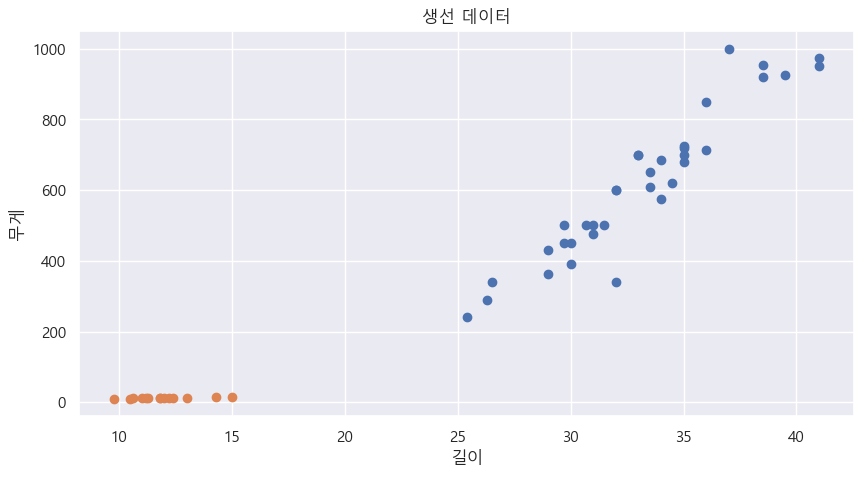

[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
[242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


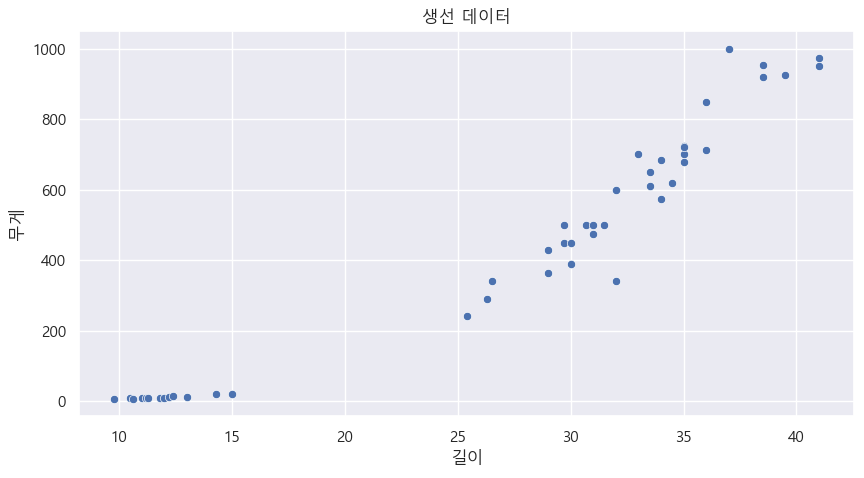

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


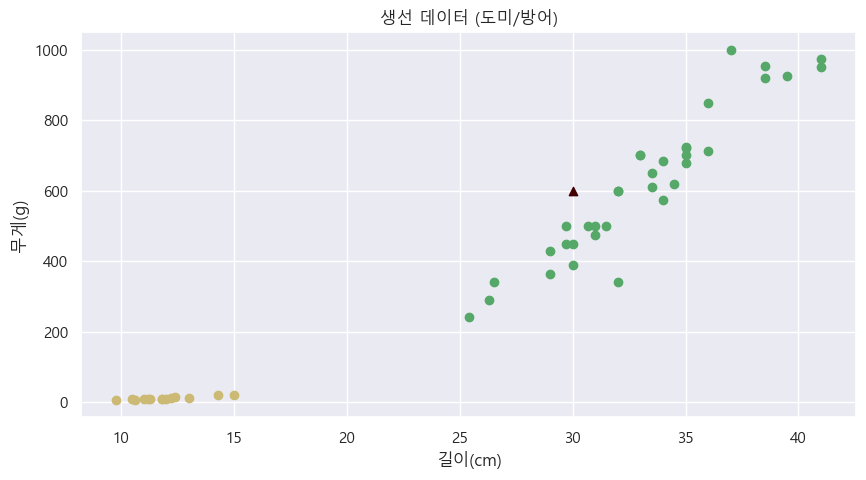

0.7142857142857143
[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [3]:
import import_ipynb
from marketML import fish_length, fish_weight

### 차원 변경 (numpy 함수)
<img src='../img/02_05_stack.png' width="50%"/><br>
- 배열 함수
    - row_stack: 배열을 나란히 행으로 넣어줌 (가로방향)
    - column_stack: 배열을 나란히 열로 넣어줌 (세로방향)
    - concatenate: 리스트로 나열<br><br>
- 수치 함수
    - ones(개수): 개수만큼 1 생성
    - zeros(개수): 개수만큼 0 생성
    - __(1,2): 배열대로(1행2열) 숫자 채워넣음
    - full((2,3),9): 2행 3열을 전부 9로 채워넣음

In [25]:
# column_stack() ~= Pandas DataFrame()
# 두 리스트를 2차원 배열로 만드는 작업
np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

1차원 리스트 -> 2차원 배열

In [5]:
#[[l,w] for l,w in zip(fish_length, fish_weight)] -> numpy
fish_data = np.column_stack((fish_length, fish_weight))
fish_data

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


정답 준비

In [6]:
# np.ones(), np.zeros()로 fish_target
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## 데이터 분리

### 사이킷런 train_test_split()
<img src="../img/02_05_split.png" width="50%"/><br>
- data 전부 전달해서 target값(stratify)을 보고 고루 섞이게 한 후 나눔
    - 변수: 튜플에 정해진 순서, 순서 바뀌면 안됨
    <br><br>
- [옵션 값](https://teddylee777.github.io/scikit-learn/train-test-split)
    - test_size: 테스트 셋 구성의 비율 (default=0.25).
        - 0.25는 전체 데이터 셋의 25%를 test (validation) 셋으로 지정하겠다는 의미이다.
        - train_size의 반대. 주로 test_size를 지정한다.
    - shuffle: split을 해주기 이전에 섞을건지의 여부 (default=True 유지).
    - stratify: classification을 다룰 때 매우 중요한 옵션값 (default=None).
        - stratify 값을 target으로 지정해주면 각각의 class 비율을 train / validation에 유지해준다.
        - (한 쪽에 쏠려서 분배되는 것을 방지)
        - 만약 이 옵션을 지정해 주지 않고 classification 문제를 다룬다면, 성능의 차이가 많이 날 수 있다.
    - random_state: 하이퍼 파라미터를 튜닝시 이 값을 고정해두고 튜닝해야 매번 데이터셋이 변경되는 것을 방지할 수 있다.


In [7]:
# 훈련세트, 테스트세트 분리하는 함수
from sklearn.model_selection import train_test_split

In [8]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

In [9]:
train_input.shape

(36, 2)

# 모델 학습

## KNN

### 평가하기

#### 테스트 세트에서 평가하기

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
kn = KNeighborsClassifier() # 객체 생성
kn.fit(X=train_input, y=train_target) # 훈련 실시

KNeighborsClassifier()

In [12]:
kn.score(X=test_input, y=test_target) # 정확도 1.0

1.0

### 예측하기

In [13]:
# 도미값 입력 예측 -> but 빙어(0)
kn.predict([[25.0, 150.0]])

array([0.])

### 데이터 확인하기

#### k-최근접: 이웃을 찾아주는 함수
kneighbors()

In [14]:
distances, indexes = kn.kneighbors([[25, 150]])

In [15]:
distances

array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
        138.39320793]])

In [16]:
indexes

array([[21, 33, 19, 30,  1]], dtype=int64)

#### 산점도: 찾아낸 이웃값들 표시

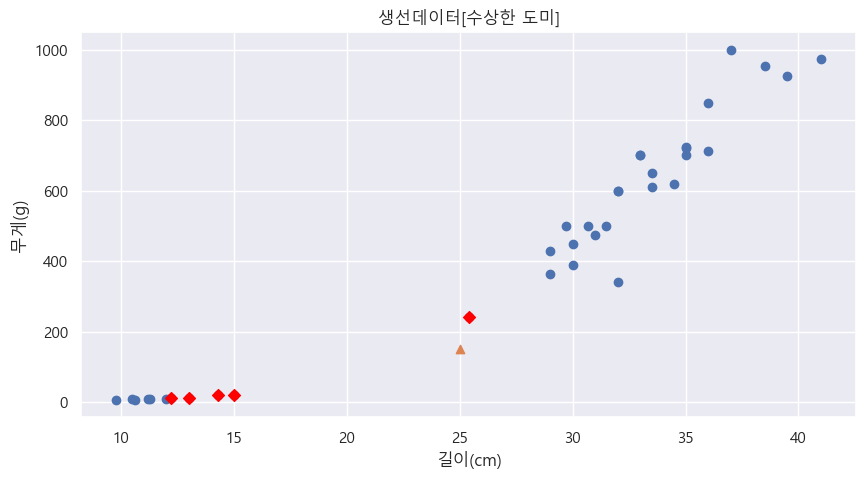

In [17]:
plt.figure(figsize=(10,5))

plt.scatter(x=train_input[:,0], y=train_input[:,1])  # 전체 생선데이터
plt.scatter(x=25, y=150, marker='^') # 예측 생선데이터
plt.scatter(x=train_input[indexes, 0], y=train_input[indexes, 1], marker='D', color='red') # k-최근접 이웃으로 도출된 데이터

plt.title('생선데이터[수상한 도미]')
plt.xlabel('길이(cm)')
plt.ylabel('무게(g)')
plt.show()

#### 예측 실패
- 이유: 기준(스케일)이 다름
- x축은 5단위, y축은 200단위
- 특성의 스케일을 맞춰줘야 하는 모델이 많음(트리구조 제외)

### 전처리

#### x축 기준변경

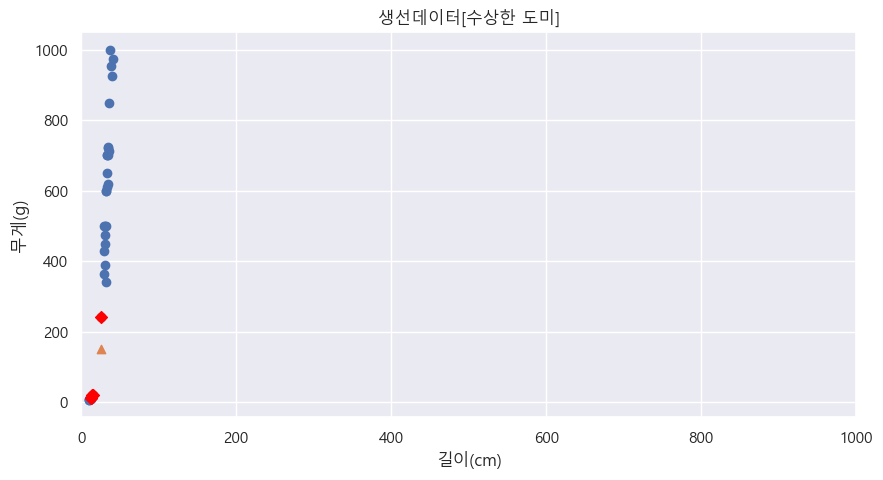

In [18]:
plt.figure(figsize=(10,5))

plt.scatter(x=train_input[:,0], y=train_input[:,1])  # 전체 생선데이터
plt.scatter(x=25, y=150, marker='^') # 예측 생선데이터
plt.scatter(x=train_input[indexes, 0], y=train_input[indexes, 1], marker='D', color='red') # D -> 다이아몬드 / k-최근접 이웃으로 도출된 데이터

plt.xlim((0, 1000)) # x축 죄표를 40에서 1000까지 늘려줌

plt.title('생선데이터[수상한 도미]')
plt.xlabel('길이(cm)')
plt.ylabel('무게(g)')
plt.show()

#### 데이터 전처리
- 표준점수로 바꾸기
    - z점수: (특성-평균)/표준편차
- 수동으로 계산해서 변환해보기 (사이킷런에 도구 존재)
    - mean: 평균
    - std: 표준편차
---
- 각 특성(열)별로 계산해줘야 한다.
- [axis](http://machinelearningkorea.com/2019/05/18/%ED%8C%8C%EC%9D%B4%EC%8D%AC-axis-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0-%EC%B9%98%ED%8A%B8%EC%BD%94%EB%93%9C/)
    - 2차원: (5,3)=(0,1)
        - axis=0 : 행(0) 데이터 5개씩 계산 -> 데이터 3개 남김
        - axis=1 : 열(1) 데이터 3개씩 계산 -> 데이터 5개 남김
    - 3차원: (5,3,2)=(0,1,2)
        - axis=0 : (0) 데이터 5개씩 계산 -> (3,2) 남김
        - axis=1 : (1) 데이터 3개씩 계산 -> (5,2) 남김
        - axis=2 : (2) 데이터 2개씩 계산 -> (5,3) 남김<br>
<img src="../img/02_05_axis.png" width="60%">

##### numpy 계산

In [19]:
# 훈련세트 각 특성(axis=0)의 평균
mean = np.mean(a=train_input, axis=0)
mean
# 생선 길이 평균 -> 27.2972
# 생선 무게 평균 -> 454.0972

array([ 27.29722222, 454.09722222])

In [20]:
# 훈련세트 각 특성(axis=0)의 표준편차
std = np.std(a=train_input, axis=0)
std
# 생선 길이 표준편차 -> 9.9824 
# 생선 무게 표준편차 -> 323.2989

array([  9.98244253, 323.29893931])

##### 표준점수 도출
- 도출한 평균과 표준편차로 변경된 스케일 데이터 추출
    - 스케일세트 = (실제값 - 평균) / 표준편차<br><br>
- [numpy 브로드캐스팅](https://appia.tistory.com/184)
    - 메모리 효율적으로 관리<br>
    <img src="../img/02_05_broadcasting.png" width="40%">

In [21]:
train_scaled = (train_input - mean)/std
train_scaled

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721],
       [ 0.97198434,  1.68853872],
       [-1.61255346, -1.3742613 ],
       [ 0.72154463,  0.51315596],
       [-1.53241275, -1.3742613 ],
       [ 0.17057727, -0.28177396],
       [ 0.5712808 ,  0.76060496],
       [ 0.34087627,  0.14198246],
       [ 1.12224816,  1.54934866],
       [ 0.62136874,  0.60594934],
       [-1.30200822, -1.34363949],
       [ 0.42101698,  0.14198246],
       [-0.19005591, -0.65604058],
       [-1.75279969, -1.38384995],
       [ 0.47110492,  0.45129371],
       [-1.68267658, -1.38137546],
       [ 0.62136874,  0.48222484],
       [-1.67265899, -1.38292202],
       [ 0.77163257,  0.76060496],
       [ 0.47110492,

예측데이터도 표준점수화

In [22]:
std_weird_bream = ([25, 150]-mean)/std
std_weird_bream

array([-0.23012627, -0.94060693])

#### 산점도

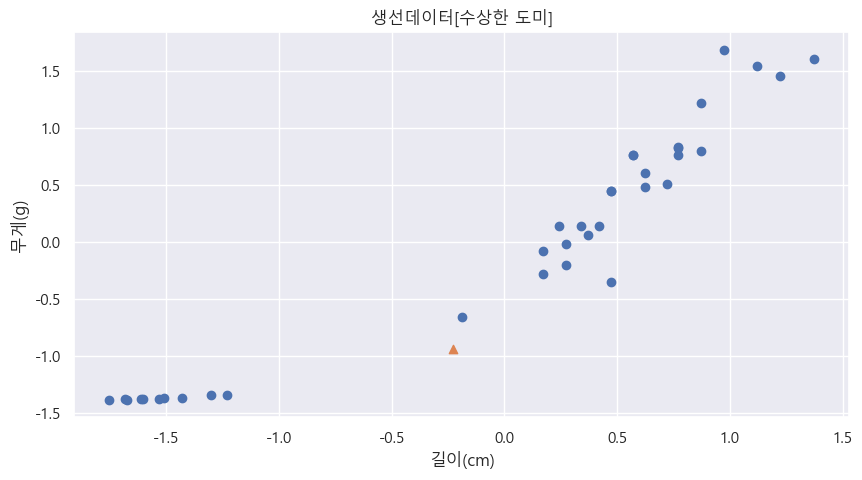

In [23]:
plt.figure(figsize=(10,5))
plt.scatter(x=train_scaled[:,0],y=train_scaled[:,1])
plt.scatter(x=std_weird_bream[0],y=std_weird_bream[1], marker='^')

plt.title('생선데이터[수상한 도미]')
plt.xlabel('길이(cm)')
plt.ylabel('무게(g)')
plt.show()

### 전처리데이터 모델 훈련

In [ ]:
kn.fit(X=train_scaled, y=train_target)

KNeighborsClassifier()

#### 테스트셋 표준점수화 시키지 않았을 때

In [ ]:
## 테스트셋을 표준점수화 시키지 않으면
kn.score(X=test_input, y=test_target)

0.6923076923076923

#### 테스트셋 표준점수화 시켰을 때

In [ ]:
# 테스트셋도 표준점수화
test_scaled = (test_input - mean)/std
test_scaled

array([[-1.63258863, -1.37457062],
       [-1.55244793, -1.37395199],
       [ 0.24070039, -0.01267317],
       [-1.55244793, -1.37364268],
       [-0.07986244, -0.35291555],
       [-1.4923424 , -1.3631261 ],
       [ 0.67145669,  0.71420828],
       [ 0.67145669,  0.3739659 ],
       [ 1.12224816,  1.44108972],
       [ 0.77163257,  0.69874271],
       [-0.09989762, -0.50757117],
       [ 0.37092904,  0.14198246],
       [ 1.37268787,  1.5338831 ]])

In [ ]:
kn.score(X=test_scaled, y=test_target)

1.0

### 재예측

In [ ]:
kn.predict(X=[std_weird_bream])

array([1.])

### 산점도: 다시 확인

In [ ]:
dist, inds = kn.kneighbors([std_weird_bream])
print((dist, inds))
# 21, 33, 19, 30, 1 -> 21, 14, 34, 32,  5

(array([[0.2873737 , 0.7711188 , 0.89552179, 0.91493515, 0.95427626]]), array([[21, 14, 34, 32,  5]], dtype=int64))


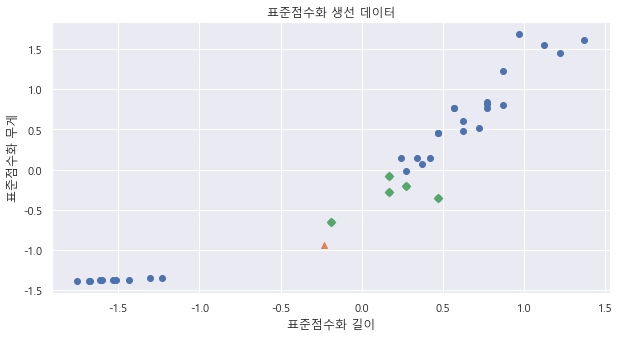

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(x=train_scaled[:,0], y=train_scaled[:,1])
plt.scatter(x=std_weird_bream[0], y=std_weird_bream[1], marker='^')
plt.scatter(x=train_scaled[inds,0], y=train_scaled[inds,1],marker='D')

plt.title('표준점수화 생선 데이터')
plt.xlabel('표준점수화 길이')
plt.ylabel('표준점수화 무게')
plt.show()

### 빙어 예측

In [ ]:
new_smelt = np.array([10.0, 8.7])
std_new_smelt = (new_smelt - mean) / std
std_new_smelt

array([-1.73276452, -1.37766373])

In [ ]:
kn.predict(X=[std_new_smelt])

array([0.])

In [ ]:
std_new_smelt

array([-1.73276452, -1.37766373])

In [ ]:
dist, inds = kn.kneighbors([std_new_smelt])
print((dist, inds))

(array([[0.02096849, 0.05022528, 0.0603351 , 0.1202592 , 0.13022865]]), array([[22, 24, 26, 11,  3]], dtype=int64))


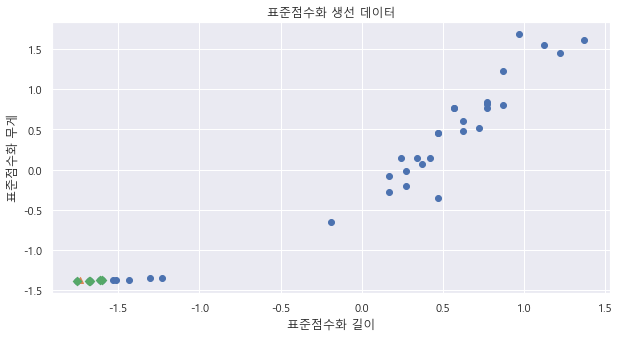

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(x=train_scaled[:,0], y=train_scaled[:,1])
plt.scatter(x=std_new_smelt[0], y=std_new_smelt[1], marker='^')
plt.scatter(x=train_scaled[inds,0], y=train_scaled[inds,1],marker='D')

plt.title('표준점수화 생선 데이터')
plt.xlabel('표준점수화 길이')
plt.ylabel('표준점수화 무게')
plt.show()